In [212]:
import numpy as np
import pandas as pd
from biosppy.signals import emg
from biosppy import plotting
import matplotlib.pyplot as plt
import tensorflow as tf

In [213]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.14.0
Eager execution: False


In [214]:
import fileinput
for lines in fileinput.FileInput("NEWrest.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)

In [215]:
rest = np.loadtxt('NEWrest.txt')

In [216]:
#Calculate RestAvg
restavg = np.average(rest)
restavg

0.09878296584522267

In [217]:
import fileinput
for lines in fileinput.FileInput("Newstrong.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)

In [218]:
forceful = np.loadtxt('NEWstrong.txt')

In [219]:
forceful.size

9251

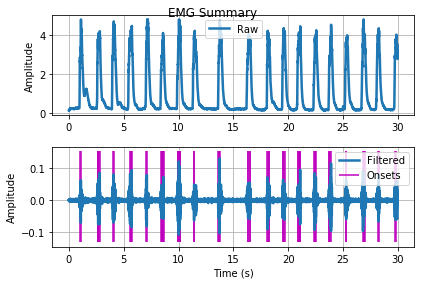

In [220]:
out = emg.emg(signal=forceful, sampling_rate=(forceful.size/30), show=True)

In [221]:
forceful1, forceful2,forceful3, forceful4 = np.split(forceful[0:9248],4)

In [222]:
forceful1.size

2312

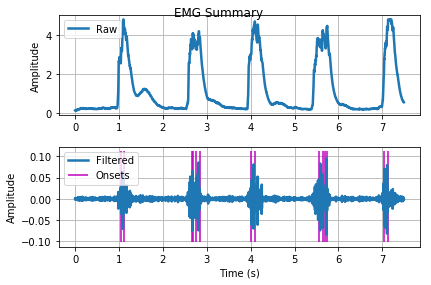

In [223]:
out = emg.emg(signal=forceful1, sampling_rate=(forceful.size/30), show=True)

In [224]:
classvar = np.zeros(len(forceful), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [225]:
df = pd.DataFrame({'data':forceful, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})


In [226]:
df.loc[12:25,'class'] = 0

In [227]:
df

data  class  MAV  MAVS  SSI  VAR  RMS  WL  Trigger
0     0.15      0    0     0    0    0    0   0        0
1     0.14      0    0     0    0    0    0   0        0
2     0.14      0    0     0    0    0    0   0        0
3     0.14      0    0     0    0    0    0   0        0
4     0.15      0    0     0    0    0    0   0        0
5     0.15      0    0     0    0    0    0   0        0
6     0.15      0    0     0    0    0    0   0        0
7     0.15      0    0     0    0    0    0   0        0
8     0.14      0    0     0    0    0    0   0        0
9     0.14      0    0     0    0    0    0   0        0
10    0.14      0    0     0    0    0    0   0        0
11    0.15      0    0     0    0    0    0   0        0
12    0.16      0    0     0    0    0    0   0        0
13    0.18      0    0     0    0    0    0   0        0
14    0.20      0    0     0    0    0    0   0        0
15    0.20      0    0     0    0    0    0   0        0
16    0.20      0    0     0    0    0    0   0        0
17    0.21      0    0     0    0    0    0   0        0
18    0.21      0    0     0    0    0    0   0        0
19    0.21      0    0     0    0    0    0   0        0
20    0.21      0    0     0    0    0    0   0        0
21    0.20      0    0     0    0    0    0   0        0
22    0.21      0    0     0    0    0    0   0        0
23    0.21      0    0     0    0    0    0   0        0
24    0.21      0    0     0    0    0    0   0        0
25    0.20      0    0     0    0    0    0   0        0
26    0.20      0    0     0    0    0    0   0        0
27    0.21      0    0     0    0    0    0   0        0
28    0.21      0    0     0    0    0    0   0        0
29    0.21      0    0     0    0    0    0   0        0
...    ...    ...  ...   ...  ...  ...  ...  ..      ...
9221  3.49      0    0     0    0    0    0   0        0
9222  3.42      0    0     0    0    0    0   0        0
9223  3.42      0    0     0    0    0    0   0        0
9224  3.36      0    0     0    0    0    0   0        0
9225  3.28      0    0     0    0    0    0   0        0
9226  3.33      0    0     0    0    0    0   0        0
9227  3.35      0    0     0    0    0    0   0        0
9228  3.26      0    0     0    0    0    0   0        0
9229  3.30      0    0     0    0    0    0   0        0
9230  3.24      0    0     0    0    0    0   0        0
9231  3.14      0    0     0    0    0    0   0        0
9232  3.10      0    0     0    0    0    0   0        0
9233  3.34      0    0     0    0    0    0   0        0
9234  3.36      0    0     0    0    0    0   0        0
9235  3.56      0    0     0    0    0    0   0        0
9236  3.56      0    0     0    0    0    0   0        0
9237  3.48      0    0     0    0    0    0   0        0
9238  3.44      0    0     0    0    0    0   0        0
9239  3.38      0    0     0    0    0    0   0        0
9240  3.31      0    0     0    0    0    0   0        0
9241  3.20      0    0     0    0    0    0   0        0
9242  3.09      0    0     0    0    0    0   0        0
9243  2.98      0    0     0    0    0    0   0        0
9244  2.90      0    0     0    0    0    0   0        0
9245  2.81      0    0     0    0    0    0   0        0
9246  2.78      0    0     0    0    0    0   0        0
9247  2.91      0    0     0    0    0    0   0        0
9248  2.96      0    0     0    0    0    0   0        0
9249  2.95      0    0     0    0    0    0   0        0
9250  3.00      0    0     0    0    0    0   0        0

[9251 rows x 9 columns]

In [228]:
for index, row in df.iterrows():
    if row['data'] > (1.4+restavg):
        df.loc[index, 'class'] = 1

In [229]:
with pd.option_context("display.max_rows", 1000):
    display(df)

data  class  MAV  MAVS  SSI  VAR  RMS  WL  Trigger
0     0.15      0    0     0    0    0    0   0        0
1     0.14      0    0     0    0    0    0   0        0
2     0.14      0    0     0    0    0    0   0        0
3     0.14      0    0     0    0    0    0   0        0
4     0.15      0    0     0    0    0    0   0        0
5     0.15      0    0     0    0    0    0   0        0
6     0.15      0    0     0    0    0    0   0        0
7     0.15      0    0     0    0    0    0   0        0
8     0.14      0    0     0    0    0    0   0        0
9     0.14      0    0     0    0    0    0   0        0
10    0.14      0    0     0    0    0    0   0        0
11    0.15      0    0     0    0    0    0   0        0
12    0.16      0    0     0    0    0    0   0        0
13    0.18      0    0     0    0    0    0   0        0
14    0.20      0    0     0    0    0    0   0        0
15    0.20      0    0     0    0    0    0   0        0
16    0.20      0    0     0    0    0    0   0        0
17    0.21      0    0     0    0    0    0   0        0
18    0.21      0    0     0    0    0    0   0        0
19    0.21      0    0     0    0    0    0   0        0
20    0.21      0    0     0    0    0    0   0        0
21    0.20      0    0     0    0    0    0   0        0
22    0.21      0    0     0    0    0    0   0        0
23    0.21      0    0     0    0    0    0   0        0
24    0.21      0    0     0    0    0    0   0        0
25    0.20      0    0     0    0    0    0   0        0
26    0.20      0    0     0    0    0    0   0        0
27    0.21      0    0     0    0    0    0   0        0
28    0.21      0    0     0    0    0    0   0        0
29    0.21      0    0     0    0    0    0   0        0
30    0.21      0    0     0    0    0    0   0        0
31    0.21      0    0     0    0    0    0   0        0
32    0.22      0    0     0    0    0    0   0        0
33    0.22      0    0     0    0    0    0   0        0
34    0.24      0    0     0    0    0    0   0        0
35    0.24      0    0     0    0    0    0   0        0
36    0.24      0    0     0    0    0    0   0        0
37    0.25      0    0     0    0    0    0   0        0
38    0.26      0    0     0    0    0    0   0        0
39    0.27      0    0     0    0    0    0   0        0
40    0.27      0    0     0    0    0    0   0        0
41    0.27      0    0     0    0    0    0   0        0
42    0.26      0    0     0    0    0    0   0        0
43    0.26      0    0     0    0    0    0   0        0
44    0.26      0    0     0    0    0    0   0        0
45    0.26      0    0     0    0    0    0   0        0
46    0.25      0    0     0    0    0    0   0        0
47    0.25      0    0     0    0    0    0   0        0
48    0.24      0    0     0    0    0    0   0        0
49    0.24      0    0     0    0    0    0   0        0
50    0.26      0    0     0    0    0    0   0        0
51    0.26      0    0     0    0    0    0   0        0
52    0.27      0    0     0    0    0    0   0        0
53    0.27      0    0     0    0    0    0   0        0
54    0.26      0    0     0    0    0    0   0        0
55    0.26      0    0     0    0    0    0   0        0
56    0.27      0    0     0    0    0    0   0        0
57    0.26      0    0     0    0    0    0   0        0
58    0.26      0    0     0    0    0    0   0        0
59    0.26      0    0     0    0    0    0   0        0
60    0.26      0    0     0    0    0    0   0        0
61    0.26      0    0     0    0    0    0   0        0
62    0.25      0    0     0    0    0    0   0        0
63    0.25      0    0     0    0    0    0   0        0
64    0.25      0    0     0    0    0    0   0        0
65    0.24      0    0     0    0    0    0   0        0
66    0.24      0    0     0    0    0    0   0        0
67    0.24      0    0     0    0    0    0   0        0
68    0.24      0    0     0    0    0    0   0        0
69    0.24      

In [230]:
print(len(df.index))


9251


In [231]:
#Calculate MAV
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'MAV'] = sum/50

In [232]:
#Calculate MAVS
for index, row in df.iterrows():
    if(index+1 < len(df.index)):
        mavs = df.loc[index+1, 'MAV'] - df.loc[index, 'MAV']
        df.loc[index, 'MAVS'] = mavs

In [233]:
#Calculate SSI
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'SSI'] = sum

In [234]:
#Calculate VAR
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(df.index)):
            sum = sum + abs(df.loc[index+index2, 'data'])**2
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'VAR'] = sum/49

In [235]:
#Calculate RMS
for index, row in df.iterrows():
    tmp = df.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    df.loc[index, 'RMS'] = final

In [236]:
#Calculate WL
for index, row in df.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(df.index)):
            sum = sum + abs((df.loc[index+index2, 'data'] + df.loc[index+index2+1, 'data']))
    if(index+index2 < len(df.index)):
        df.loc[index+index2, 'WL'] = sum/50

In [237]:
#Calculate Trigger
for index, row in df.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(df.index)):
            sum = sum + df.loc[index+index2, 'class']
    if(index+index2 < len(df.index)):
        if(sum/10 > .75):
            df.loc[index+index2, 'Trigger'] = 1
        else:
            df.loc[index+index2, 'Trigger'] = 0

In [238]:
#df
with pd.option_context("display.max_rows", 1000):
    display(df)

data  class     MAV          MAVS       SSI        VAR       RMS  \
0     0.15      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
1     0.14      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
2     0.14      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
3     0.14      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
4     0.15      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
5     0.15      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
6     0.15      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
7     0.15      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
8     0.14      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
9     0.14      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
10    0.14      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
11    0.15      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
12    0.16      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
13    0.18      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
14    0.20      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
15    0.20      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
16    0.20      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
17    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
18    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
19    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
20    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
21    0.20      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
22    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
23    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
24    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
25    0.20      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
26    0.20      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
27    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
28    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
29    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
30    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
31    0.21      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
32    0.22      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
33    0.22      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
34    0.24      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
35    0.24      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
36    0.24      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
37    0.25      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
38    0.26      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
39    0.27      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
40    0.27      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
41    0.27      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
42    0.26      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
43    0.26      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
44    0.26      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
45    0.26      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
46    0.25      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
47    0.25      0  0.0000  0.000000e+00    0.0000   0.000000  0.000000   
48    0.24      0  0.0000  2.060000e-01    0.0000   0.000000  0.000000   
49    0.24      0  0.2060  2.200000e-03    2.2088   0.045078  0.210181   
50    0.26      0  0.2082  2.400000e-03    2.2539   0.045998  0.212316   
51    0.26      0  0.2106  2.600000e-03    2.3019   0.046978  0.214565   
52    0.27      0  0.2132  2.600000e-03    2.3552   0.048065  0.217035   
53    0.27

In [239]:
for lines in fileinput.FileInput("NEWsoft.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    print(lines)
soft = np.loadtxt('NEWsoft.txt')

In [240]:
soft.size

9250

In [241]:
soft1, soft2, soft3, soft4 = np.split(soft[0:9248],4)

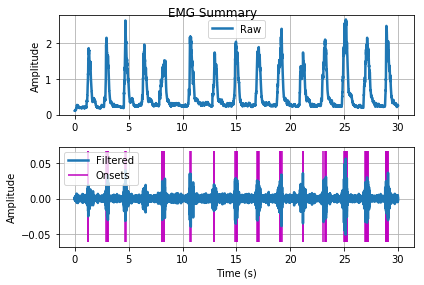

In [242]:
out = emg.emg(signal=soft, sampling_rate=(soft.size/30), show=True)

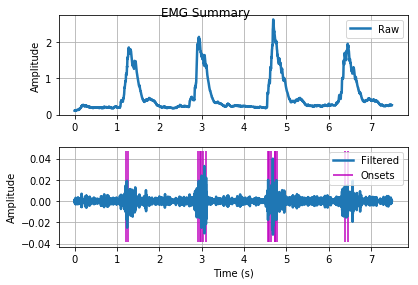

In [243]:
out = emg.emg(signal=soft1, sampling_rate=(soft.size/30), show=True)

In [244]:
classvar = np.zeros(len(soft), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [245]:
dfs = pd.DataFrame({'data':soft, 'class':classvar, 'MAV':classvar, 'MAVS':classvar,'SSI':classvar, 'VAR':classvar,'RMS':classvar, 'WL':classvar, 'Trigger':classvar})

In [246]:
for index, row in dfs.iterrows():
    if row['data'] > (1.0+restavg):
        dfs.loc[index, 'class'] = 1

In [247]:
#dfs
#with pd.option_context("display.max_rows", 1000):
#    display(dfs)

In [248]:
#Calculate MAV
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'data']
    if(index+index2 < len(df.index)):
        dfs.loc[index+index2, 'MAV'] = sum/50

In [249]:
#Calculate MAVS
for index, row in dfs.iterrows():
    if(index+1 < len(dfs.index)):
        mavs = dfs.loc[index+1, 'MAV'] - dfs.loc[index, 'MAV']
        dfs.loc[index, 'MAVS'] = mavs

In [250]:
#Calculate SSI
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'SSI'] = sum

In [251]:
#Calculate VAR
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2 < len(dfs.index)):
            sum = sum + abs(dfs.loc[index+index2, 'data'])**2
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'VAR'] = sum/49

In [252]:
#Calculate RMS
for index, row in dfs.iterrows():
    tmp = dfs.loc[index, 'SSI']/50
    final = np.sqrt(tmp)
    dfs.loc[index, 'RMS'] = final

In [253]:
#Calculate WL
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(50):
        if(index+index2+1 < len(dfs.index)):
            sum = sum + abs((dfs.loc[index+index2, 'data'] + dfs.loc[index+index2+1, 'data']))
    if(index+index2 < len(dfs.index)):
        dfs.loc[index+index2, 'WL'] = sum/50

In [254]:
#Calculate Trigger
for index, row in dfs.iterrows():
    sum = 0
    for index2 in range(10):
        if(index+index2 < len(dfs.index)):
            sum = sum + dfs.loc[index+index2, 'class']
    if(index+index2 < len(dfs.index)):
        if(sum/10 > .75):
            dfs.loc[index+index2, 'Trigger'] = 2
        else:
            dfs.loc[index+index2, 'Trigger'] = 0

In [256]:
#dfs
with pd.option_context("display.max_rows", 1000):
    display(dfs)

data  class     MAV          MAVS       SSI       VAR       RMS      WL  \
0     0.11    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
1     0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
2     0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
3     0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
4     0.11    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
5     0.11    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
6     0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
7     0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
8     0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
9     0.11    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
10    0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
11    0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
12    0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
13    0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
14    0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
15    0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
16    0.12    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
17    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
18    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
19    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
20    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
21    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
22    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
23    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
24    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
25    0.14    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
26    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
27    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
28    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
29    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
30    0.13    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
31    0.14    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
32    0.14    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
33    0.14    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
34    0.14    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
35    0.14    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
36    0.16    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
37    0.17    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
38    0.17    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
39    0.17    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
40    0.18    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
41    0.18    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
42    0.18    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
43    0.18    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
44    0.18    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
45    0.19    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
46    0.19    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
47    0.20    0.0  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
48    0.21    0.0  0.0000  1.422000e-

In [257]:
df = df.drop(['class'], axis=1)
dfs = dfs.drop(['class'], axis=1)
df.dtypes

data       float64
MAV        float64
MAVS       float64
SSI        float64
VAR        float64
RMS        float64
WL         float64
Trigger      int64
dtype: object

In [283]:
train = df.loc[0:len(df.index)*.75]
len(train)

6939

In [284]:
test = df.loc[len(train.index):len(df.index)]
len(test)

2312

In [285]:
trains = dfs.loc[0:len(dfs.index)*.75]
len(trains)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(trains)

      data     MAV          MAVS       SSI       VAR       RMS      WL  \
0     0.11  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
1     0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
2     0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
3     0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
4     0.11  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
5     0.11  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
6     0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
7     0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
8     0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
9     0.11  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
10    0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
11    0.12  0.0000  0.000000e+00    0.0000  0.000000  0.000000  0.0000   
12    0.12  0.0000  0.000000e+00    0.

In [286]:
tests = dfs.loc[len(trains.index):len(dfs.index)]
len(tests)

2312

In [287]:
train = train.append(trains,ignore_index=True)

In [288]:
test = test.append(tests,ignore_index=True)

In [289]:
len(train)

13878

In [290]:
len(test)

4624

In [291]:
target = train.pop('Trigger')

In [292]:
dataset = tf.data.Dataset.from_tensor_slices((train.values, target.values))

In [307]:
train_dataset = dataset.shuffle(len(train)).batch(1)

<DatasetV1Adapter shapes: ((?, 7), (?,)), types: (tf.float64, tf.float64)>

In [294]:
def get_compiled_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model

In [295]:
model = get_compiled_model()
model.fit(train_dataset, epochs=15)

13878/13878 [==============================] - 38s 3ms/step - loss: 0.1442 - acc: 0.8399


In [296]:
target2 = test.pop('Trigger')



In [297]:
scores = model.evaluate(test.values, target2.values,verbose=0)

In [298]:
cvscores = []
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 81.94%
81.94% (+/- 0.00%)


In [299]:
prediction = model.predict(test.values)

In [300]:
prediction = pd.DataFrame(prediction)

In [301]:
answers = pd.DataFrame(target2.values)


In [302]:
model.save("my_model.h5")

In [303]:
new_model = tf.keras.models.load_model('my_model.h5')

In [304]:
scores = new_model.evaluate(test.values, target2.values,verbose=0)
scores

[nan, 0.8194204]

In [305]:
result = pd.concat([prediction, answers], axis=1, sort=False)

In [306]:
with pd.option_context("display.max_rows", 4000):
    display(result)

0    0
0     0.999452  1.0
1     0.999464  1.0
2     0.999472  1.0
3     0.999524  1.0
4     0.999570  1.0
5     0.999632  1.0
6     0.999646  1.0
7     0.999655  1.0
8     0.999680  1.0
9     0.999698  1.0
10    0.999769  1.0
11    0.999796  1.0
12    0.999837  1.0
13    0.999853  1.0
14    0.999855  1.0
15    0.999855  1.0
16    0.999869  1.0
17    0.999886  1.0
18    0.999897  1.0
19    0.999906  1.0
20    0.999915  1.0
21    0.999926  1.0
22    0.999931  1.0
23    0.999932  1.0
24    0.999931  1.0
25    0.999928  1.0
26    0.999926  1.0
27    0.999924  1.0
28    0.999921  1.0
29    0.999918  1.0
30    0.999913  1.0
31    0.999906  1.0
32    0.999900  1.0
33    0.999892  1.0
34    0.999880  1.0
35    0.999875  1.0
36    0.999872  1.0
37    0.999865  1.0
38    0.999857  1.0
39    0.999845  1.0
40    0.999829  1.0
41    0.999813  1.0
42    0.999798  1.0
43    0.999791  1.0
44    0.999779  1.0
45    0.999764  1.0
46    0.999742  1.0
47    0.999718  1.0
48    0.999707  1.0
49    0.999684  1.0
50    0.999651  1.0
51    0.999615  1.0
52    0.999579  1.0
53    0.999543  1.0
54    0.999514  1.0
55    0.999459  1.0
56    0.999432  1.0
57    0.999404  1.0
58    0.999345  1.0
59    0.999273  1.0
60    0.999182  1.0
61    0.999064  1.0
62    0.998917  1.0
63    0.998752  1.0
64    0.998560  1.0
65    0.998357  1.0
66    0.998102  1.0
67    0.997803  1.0
68    0.997433  1.0
69    0.997004  1.0
70    0.996520  0.0
71    0.995937  0.0
72    0.995260  0.0
73    0.994471  0.0
74    0.993592  0.0
75    0.992575  0.0
76    0.991478  0.0
77    0.990309  0.0
78    0.989069  0.0
79    0.987696  0.0
80    0.986134  0.0
81    0.984422  0.0
82    0.982455  0.0
83    0.980641  0.0
84    0.978574  0.0
85    0.976404  0.0
86    0.974039  0.0
87    0.971478  0.0
88    0.968589  0.0
89    0.966466  0.0
90    0.963516  0.0
91    0.959976  0.0
92    0.956621  0.0
93    0.953254  0.0
94    0.949435  0.0
95    0.945451  0.0
96    0.941336  0.0
97    0.936958  0.0
98    0.932264  0.0
99    0.927769  0.0
100   0.923212  0.0
101   0.918614  0.0
102   0.914376  0.0
103   0.909514  0.0
104   0.904513  0.0
105   0.893524  0.0
106   0.878617  0.0
107   0.863837  0.0
108   0.837072  0.0
109   0.790356  0.0
110   0.739908  0.0
111   0.685518  0.0
112   0.629048  0.0
113   0.576539  0.0
114   0.500165  0.0
115   0.408507  0.0
116   0.327539  0.0
117   0.259773  0.0
118   0.210589  0.0
119   0.170377  0.0
120   0.136718  0.0
121   0.107774  0.0
122   0.084820  0.0
123   0.067871  0.0
124   0.055104  0.0
125   0.045516  0.0
126   0.038129  0.0
127   0.032375  0.0
128   0.027565  0.0
129   0.023292  0.0
130   0.018046  0.0
131   0.014247  0.0
132   0.011467  0.0
133   0.009267  0.0
134   0.007575  0.0
135   0.006273  0.0
136   0.005251  0.0
137   0.004440  0.0
138   0.003788  0.0
139   0.003212  0.0
140   0.002756  0.0
141   0.002406  0.0
142   0.002056  0.0
143   0.001769  0.0
144   0.001518  0.0
145   0.001318  0.0
146   0.001155  0.0
147   0.001030  0.0
148   0.000925  0.0
149   0.000835  0.0
150   0.000752  0.0
151   0.000679  0.0
152   0.000619  0.0
153   0.000562  0.0
154   0.000512  0.0
155   0.000473  0.0
156   0.000436  0.0
157   0.000405  0.0
158   0.000376  0.0
159   0.000347  0.0
160   0.000324  0.0
161   0.000301  0.0
162   0.000284  0.0
163   0.000270  0.0
164   0.000256  0.0
165   0.000243  0.0
166   0.000231  0.0
167   0.000221  0.0
168   0.000212  0.0
169   0.000203  0.0
170   0.000195  0.0
171   0.000187  0.0
172   0.000181  0.0
173   0.000175  0.0
174   0.000169  0.0
175   0.000164  0.0
176   0.000161  0.0
177   0.000156  0.0
178   0.000152  0.0
179   0.000148  0.0
180   0.000146  0.0
181   0.000143  0.0
182   0.000140  0.0
183   0.000138  0.0
184   0.000137  0.0
185   0.000135  0.0
186   0.000132  0.0
187   0.000131  0.0
188   0.000129  0.0
189   0.000128  0.0
190   0.000127  0.0
191   0.000126  0.0
192   0.000124  0.0
193   0.000124  0.0
194   0.000123  0.0
195   0.000122  0.0
196   0.000121  0.0
197   0.000121  0.0
198   0.000120  0.0
199   0.00011

In [282]:
if '1.0' in prediction.columns:
    print('1.0')